In [ ]:
from pathlib import Path
import tensorflow as tf
import sys

In [ ]:
project_path = Path(__file__).parent.parent

In [ ]:
sys.path.append(project_path)
from finetune_service import fine_tune

In [ ]:
data_path = Path("data")
model_label = "densenet121"

In [13]:
train_path = data_path / "train.csv"
valid_path = data_path / "valid.csv"
test_path = data_path / "test.csv"

In [14]:
IMG_SIZE = (224, 224)
IMG_SHAPE = IMG_SIZE + (3,)
BATCH_SIZE = 32

In [15]:
base_model = tf.keras.applications.DenseNet121(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights="imagenet",
)

base_model_layer_name = base_model.name
last_conv_layer_name = "conv5_block16_2_conv"
pre_process = tf.keras.applications.densenet.preprocess_input

Found 76410 validated image filenames.
Found 9551 validated image filenames.
Found 9551 validated image filenames.
Start training classifier


2026-01-15 17:15:40.289380: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 90501


299/299 ━━━━━━━━━━━━━━━━━━━━ 73s 215ms/step - auc: 0.4918 - loss: 1.0612
initial loss: 1.06
initial auc: 0.49
Epoch 1/10
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 600s 246ms/step - auc: 0.5499 - loss: 0.4736 - val_auc: 0.6295 - val_loss: 0.4186
Epoch 2/10
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 586s 245ms/step - auc: 0.6076 - loss: 0.4306 - val_auc: 0.6582 - val_loss: 0.4099
Epoch 3/10
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 588s 246ms/step - auc: 0.6311 - loss: 0.4189 - val_auc: 0.6713 - val_loss: 0.4064
Epoch 4/10
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 587s 246ms/step - auc: 0.6445 - loss: 0.4133 - val_auc: 0.6776 - val_loss: 0.4052
Epoch 5/10
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 586s 246ms/step - auc: 0.6526 - loss: 0.4104 - val_auc: 0.6802 - val_loss: 0.4038
Epoch 6/10
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 586s 245ms/step - auc: 0.6574 - loss: 0.4089 - val_auc: 0.6833 - val_loss: 0.4033
Epoch 7/10
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 587s 246ms/step - auc: 0.6620 - loss: 0.4075 - val_auc: 0.6850 - val_loss: 0.4033
Epoch 8/10
2388/2388 ━

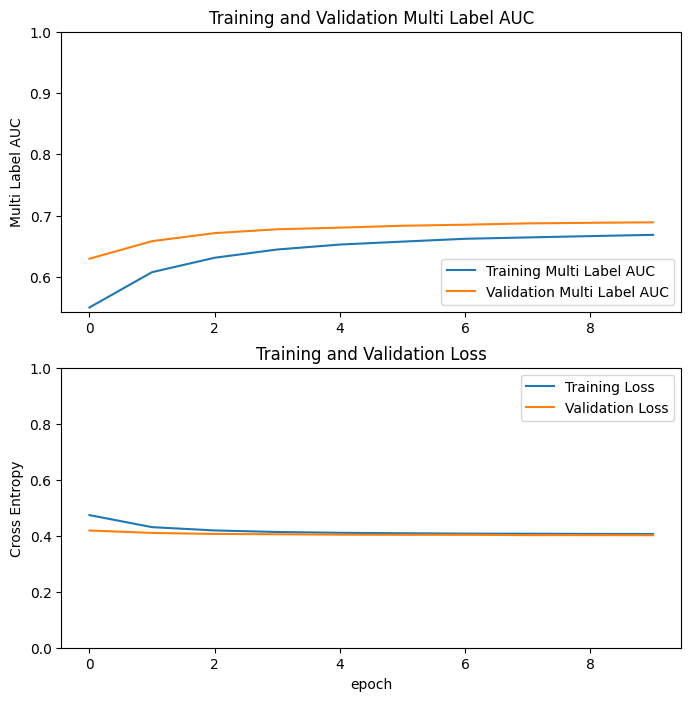

Let's select the best checkpoint based on multi label auc:
model_epoch_01.keras      | Test: 0.6308 | Val: 0.6295 | Gap: -0.0013
model_epoch_02.keras      | Test: 0.6582 | Val: 0.6582 | Gap: -0.0000
model_epoch_03.keras      | Test: 0.6703 | Val: 0.6713 | Gap: 0.0010
model_epoch_04.keras      | Test: 0.6763 | Val: 0.6776 | Gap: 0.0013
model_epoch_05.keras      | Test: 0.6791 | Val: 0.6802 | Gap: 0.0011
model_epoch_06.keras      | Test: 0.6830 | Val: 0.6833 | Gap: 0.0003
model_epoch_07.keras      | Test: 0.6844 | Val: 0.6850 | Gap: 0.0006
model_epoch_08.keras      | Test: 0.6862 | Val: 0.6872 | Gap: 0.0010
model_epoch_09.keras      | Test: 0.6868 | Val: 0.6881 | Gap: 0.0013
model_epoch_10.keras      | Test: 0.6876 | Val: 0.6889 | Gap: 0.0013

Best checkpoint: model_epoch_10.keras with test multi label auc = 0.6876
Start finetuning classifier
Number of layers in the base model:  427
Number of trainable variables in the model:  100
Epoch 11/20
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 785s 315ms/ste

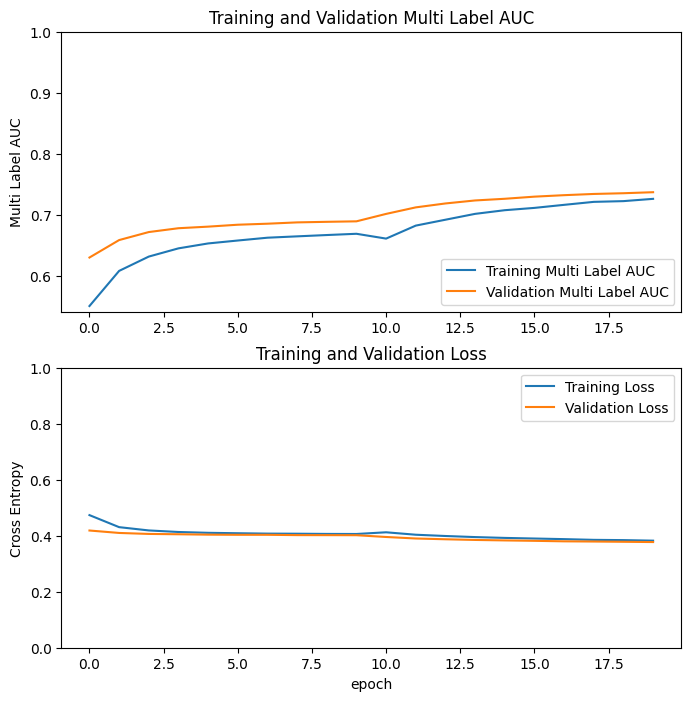

Let's select the best checkpoint based on multi label auc:
model_epoch_11.keras      | Test: 0.7015 | Val: 0.7011 | Gap: -0.0004
model_epoch_12.keras      | Test: 0.7121 | Val: 0.7118 | Gap: -0.0003
model_epoch_13.keras      | Test: 0.7185 | Val: 0.7182 | Gap: -0.0003
model_epoch_14.keras      | Test: 0.7231 | Val: 0.7232 | Gap: 0.0001
model_epoch_15.keras      | Test: 0.7271 | Val: 0.7259 | Gap: -0.0012
model_epoch_16.keras      | Test: 0.7303 | Val: 0.7294 | Gap: -0.0009
model_epoch_17.keras      | Test: 0.7329 | Val: 0.7318 | Gap: -0.0010
model_epoch_18.keras      | Test: 0.7350 | Val: 0.7338 | Gap: -0.0012
model_epoch_19.keras      | Test: 0.7367 | Val: 0.7350 | Gap: -0.0017
model_epoch_20.keras      | Test: 0.7383 | Val: 0.7367 | Gap: -0.0016

Best checkpoint: model_epoch_20.keras with test multi label auc = 0.7383
299/299 ━━━━━━━━━━━━━━━━━━━━ 70s 220ms/step
Individual auc for each pathology:
No Finding: AUC = 0.8615
Enlarged Cardiomediastinum: AUC = 0.5959
Cardiomegaly: AUC = 0.7

In [16]:
fine_tune(
    train_path=train_path,
    val_path=valid_path,
    test_path=test_path,
    batch_size=BATCH_SIZE,
    img_size=IMG_SIZE,
    base_model=base_model,
    base_model_layer_name=base_model_layer_name,
    pre_process=pre_process,
    dropout=0.3,
    lr_classifier=10e-5,
    epochs_classifier=10,
    cp_path=project_path / "models" / model_label / "cp",
    fine_tune_at=313,
    lr_finetune=10e-6,
    epochs_finetune=10,
    model_save_path=project_path / "models" / model_label,
    last_conv_layer_name=last_conv_layer_name,
)